# 5. Logistic回归
回归：假设有一些数据点，用一条直线对这些点进行拟合（该线称为最佳拟合直线），这个拟合过程就称为回归。  

Logistics回归适用于标签 𝑦 取值离散的情况，如：1 0 0 1。

在二分类任务中，因变量可能属于的两个分类记为0,1，因变量$y\in\{0,1\}$，我们需要一个函数，输出值是0或1，(Heaviside step function)或者称为单位越阶函数可以做到。然而该函数在跳跃点上从0直接跳跃到1，这个瞬间跳跃过程有时很难处理。Sigmod有类似性质，且数学上更容易处理，Sigmod函数的公式如下：

$
g(z)=\frac{1}{1+e^{-z}}
$

引入一个逻辑回归模型，模型的假设函数是 $h_\theta(x)=g(\theta^{T}X)$，其中X表示特征向量，g表示逻辑函数。

$h\theta(x)$的作用是，对于给定的输入变量x，根据选择的参数计算输出变量=1 的可能性（estimated probablity）即$h\theta(x)=P(y=1|x;\theta)$

例如，如果对于给定的𝑥，通过已经确定的参数计算得出$h\theta(x)=0.7$，则表示有 70%的几率y为正向类，相应地y为负向类的几率为 1-0.7=0.3。

$
h_\theta(x)=g(\theta^{T}X) \\
g(z)=\frac{1}{1+e^{-z}}
$

sigmod函数的输入记为z，z由下面的公式给出$z=\theta_0x_0+\theta_1x_1+...+\theta_nx_n$，如果采用向量的写法，上述公式写做$z=\theta^{T}X$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#定义sigmod函数

def sigmod(z):
    return 1/(1+np.exp(-z))

x = np.arange(-5,5,0.01)
y = sigmod(x)
y05 = np.full(x.shape, 0.5)

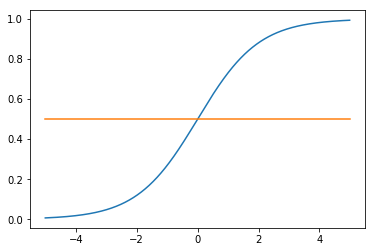

In [3]:
plt.plot(x,y)
plt.plot(x,y05)
plt.show()

training set: $\{(x_0,y_0),(x_1,y_1)....(x_n,y_n)\}$ 

n samples: $
    x\in
    \begin{array}
	{|c|}
	x_{0} \\
	x_{1}\\
	\vdots&\\
	y_{n}
	\end{array}
    \qquad y\in\{0,1\}
    $
    
怎么选择向量$\theta$呢？

对于线性回归模型，定义的代价函数是所有模型误差的平方和。

$J(\theta) = \frac{1}{m}\sum_{i=1}^m \frac{1}{2}(h_\theta(x^i)-y^i))^2$

In [4]:
# 假设函数
def Htheta(theta, X):
    theta = np.matrix(theta)
    return sigmod(np.dot(X,theta.T))

# 损失函数
def Jtheta(theta, x, y,m):
    return 1/m * sum(1/2 * pow(Htheta(theta, x)-y ,2))

使用梯度下降算法，求解 theta
算法为：

$
Repeat \{
\theta_j:=\theta_j-\alpha \frac{\partial}{\partial \theta_j} J(\theta) \\
\qquad (simultaneously update all \theta_j)
\}
$

求导后得到：

$
Repeat \{ 
\theta_j:=\theta_j-\alpha \frac{1}{m}\sum_{i=1}^m(h\theta(x^i)-y^i)x_j^i \\
\qquad (simultaneously update all \theta_j)
\}
$

In [38]:

# 损失函数，就是上面说的Jtheta
def compute_cost(X,Y,theta):
    # 两个数组作矩阵乘积
    # 当两个数组的维度不能直接进行矩阵乘法时，dot会把后面的参数进行转置
    # 这是假设函数
    #hypthesis = np.dot(X,np.transpose(theta))
    hypthesis = 1/(1+np.exp(-np.dot(X,np.transpose(theta))))
    # 先转置再做矩阵乘法
    cost = np.dot(np.transpose(hypthesis - Y),(hypthesis -Y))
    cost = cost / (2 * X.shape[0])
    return cost


# 使用梯度下降算法，求解 theta
def gradeDescent(X, y, alpha=0.01, iter_num=500):
    # 样本个数
    m = y.shape[0]
    # 代价的历史值
    J_history = np.zeros(iter_num)
    theta_history = np.zeros((X.shape[1], iter_num))
    theta = np.zeros(X.shape[1])
    # 进行迭代计算
    for num in range(0,iter_num):
        # 计算每一个theta值下的代价值
        J_history[num] = compute_cost(X,y,theta)
        # 根据公式计算梯度，来更新theta的值
        #hyp = np.dot(X,np.transpose(theta))
        hyp = 1/(1+np.exp(-np.dot(X,np.transpose(theta))))
        theta = theta - alpha * np.dot(np.transpose(hyp -y),X) / m
        for i in range(X.shape[1]):
            theta_history[i][num] = theta[i]
    
    return theta,J_history, theta_history

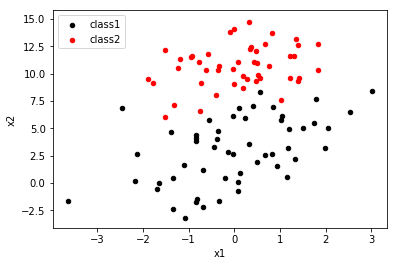

In [43]:
#读取训练数据并绘制图

df = pd.read_csv("testSet.txt", sep='\t')
labels = df.labels
dataMat = df.iloc[:,0:-1]
x3 = np.full(dataMat.shape[0], 1)
dataMat['x3']= x3

# 用两种不同的颜色，在同一张图像上，绘制两个类别的数据散点图
def plot_data(df):
    plt.figure()
    pos = df[df['labels']==1]
    neg = df[df['labels']==0]
    plt.scatter(pos.x1,pos.x2,c='black',marker='o',s=20)
    plt.scatter(neg.x1,neg.x2,c='red',marker='o',s=20)
    plt.legend(['class1', 'class2'])
    plt.xlabel('x1')
    plt.ylabel('x2')
plot_data(df)
# plt.legend(['class1', 'class2'])
# plt.xlabel('x1')
# plt.ylabel('x2')
plt.show()

(500,) (3,)


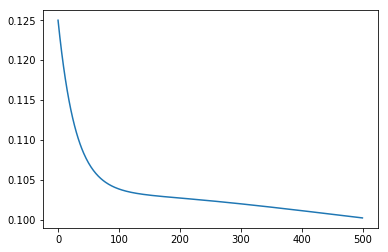

In [46]:
theta, J, theta_his = gradeDescent(dataMat, labels, alpha=0.001, iter_num=500)
print(J.shape, theta.shape)
plt.plot(np.array([i for i in range(0,500)]), J[:500])

plt.show()

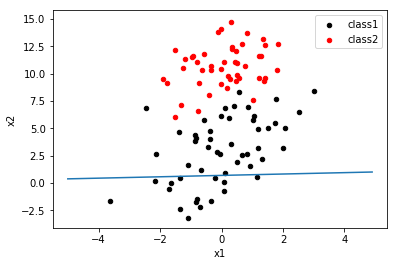

In [49]:
x = np.arange(-5.0, 5.0, 0.1)
y = (-theta[2]-theta[0]*x)/theta[1]

plot_data(df)
plt.plot(x,y)
plt.show()